# Name: Mohamed Radwan
# Student Id: 106779

-----------------------------------------------------------------------------------------------------------------------------------------

# 1. Introduction:

This report aims to gives a reflection what has been done in the process of building database from large dataset from multiple surface weather stations. The supplied data with the datafile all_weather_data.csv which contains data from weather stations.

-----------------------------------------------------------------------------------------------------------------------------------------

# 2. Used Tools

- Python Ver 3.7.4
- mysql  Ver 15.1 Distrib 10.3.22-MariaDB, for debian-linux-gnueabihf (armv8l) using readline 5.2
- MySQL Workbench CE (GPL) 8.0.19
- Libraries: pandas 0.25.1, numpy 1.17.2,  matplotlib  3.1.1, jupyterlab 1.1.4, pymysql 0.9.3, scikit-learn 0.21.3, hoggorm

-----------------------------------------------------------------------------------------------------------------------------------------

# 3. Method

### Import essential libraries

In [449]:
import pandas as pd
import matplotlib.pyplot as plt
import pymysql
import numpy as np
import hoggorm as ho
import hoggormplot as hop
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from IPython.display import Image

-----------------------------------------------------------------------------------------------------------------------------------------

## 3.1. Task 1

### Reading the raw data

The data was read as a pandas dataframe, However it could be read as csv file
- Dataframe allows easier plots of the raw data as requested
- It allows later loading the data frame into the database using pymysql

In [442]:
data = pd.read_csv('all_weather_data.csv', delimiter=';')

In [443]:
data.shape

(80830, 16)

In [445]:
data.describe()

,index,air_temp_set_1,altimeter_set_1,dew_point_temperature_set_1d,heat_index_set_1d,pressure_set_1d,relative_humidity_set_1,sea_level_pressure_set_1d,weather_cond_code_set_1,wind_chill_set_1d,wind_direction_set_1,wind_gust_set_1,wind_speed_set_1
count,80830.000000,80830.000000,8.083000e+04,80830.000000,80830.000000,80830.000000,80830.000000,80830.000000,80830.000000,80830.000000,80830.000000,80830.000000,80830.000000
mean,40414.500000,14.969346,1.012574e+05,7.319132,5.783737,98965.008819,65.564549,100962.106766,134.795905,0.077766,142.138191,0.473489,3.395961
std,23333.755466,10.618843,5.853805e+03,10.315624,12.982907,6399.990388,23.798742,7860.771570,4289.353832,2.034930,111.667208,2.375449,2.498427
min,0.000000,-20.000000,0.000000e+00,-24.790000,0.000000,0.000000,0.000000,0.000000,0.000000,-25.890000,0.000000,0.000000,0.000000
25%,20207.250000,7.000000,1.009821e+05,-0.160000,0.000000,98345.100000,48.310000,100894.850000,0.000000,0.000000,40.000000,0.000000,1.540000
50%,40414.500000,14.000000,1.013986e+05,5.960000,0.000000,100047.780000,69.850000,101369.165000,0.000000,0.000000,120.000000,0.000000,3.090000
75%,60621.750000,23.000000,1.020014e+05,15.980000,0.000000,101052.450000,86.480000,102054.450000,0.000000,0.000000,230.000000,0.000000,4.630000
max,80829.000000,45.000000,1.000301e+06,29.010000,54.010000,955466.110000,100.000000,996412.450000,209380.000000,38.740000,360.000000,29.840000,33.440000


In [447]:
data

,index,Date_Time,Station_ID,air_temp_set_1,altimeter_set_1,dew_point_temperature_set_1d,heat_index_set_1d,pressure_set_1d,relative_humidity_set_1,sea_level_pressure_set_1d,weather_cond_code_set_1,wind_cardinal_direction_set_1d,wind_chill_set_1d,wind_direction_set_1,wind_gust_set_1,wind_speed_set_1
0,0,2019-04-01 00:00:00,BIAR,2.0,99898.42,-2.06,0.0,99877.56,74.78,99900.24,0.0,SSW,0.0,210.0,0.0,1.54
1,1,2019-04-01 01:00:00,BIAR,2.0,99898.42,-2.06,0.0,99877.56,74.78,99900.24,0.0,W,0.0,260.0,0.0,2.06
2,2,2019-04-01 02:00:00,BIAR,1.0,99898.42,-2.05,0.0,99877.56,80.34,99900.32,0.0,WSW,0.0,250.0,0.0,1.54
3,3,2019-04-01 03:00:00,BIAR,1.0,99898.42,-2.05,0.0,99877.56,80.34,99900.32,0.0,SW,0.0,230.0,0.0,1.54
4,4,2019-04-01 04:00:00,BIAR,0.0,99898.42,-2.03,0.0,99877.56,86.37,99900.41,20.0,NaN,0.0,0.0,0.0,1.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80825,80825,2019-04-30 23:00:00,ZSSS,16.0,101198.79,12.98,0.0,101163.03,82.40,101199.46,31.0,WNW,0.0,290.0,0.0,3.00
80826,80826,2019-04-30 23:30:00,ZSSS,17.0,101198.79,13.98,0.0,101163.03,82.52,101199.34,31.0,W,0.0,280.0,0.0,3.00
80827,80827,2019-05-01 00:00:00,ZSSS,18.0,101198.79,13.98,0.0,101163.03,77.48,101199.21,31.0,WNW,0.0,290.0,0.0,4.00
80828,80828,2019-05-01 00:30:00,ZSSS,19.0,101198.79,13.97,0.0,101163.03,72.78,101199.09,31.0,NW,0.0,320.0,0.0,4.00


-----------------------------------------------------------------------------------------------------------------------------------------

## 3.2. Task 2

### FMMI Plots

In [4]:
data['Date_Time'] = pd.to_datetime(data['Date_Time'], errors='coerce')
data['normalised_date'] = data['Date_Time'].dt.normalize()

In [5]:
FMMI = data.where(data["Station_ID"]=="FMMI").dropna()

FMMI_his_clean = FMMI[(FMMI[['heat_index_set_1d']] != 0).all(axis=1)]
FMMI_air_temp_set_clean = FMMI[(FMMI[['air_temp_set_1']] != 0).all(axis=1)]

FMMI_wind_speed_clean = FMMI[(FMMI[['wind_speed_set_1']] != 0).all(axis=1)]
FMMI_wind_gust_temp_set_clean = FMMI[(FMMI[['wind_gust_set_1']] != 0).all(axis=1)]

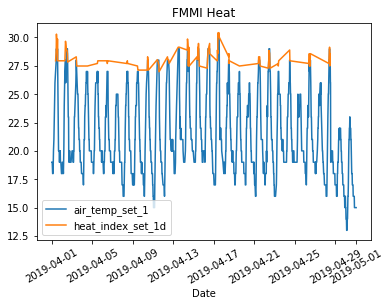

In [455]:
plt.plot(FMMI_air_temp_set_clean['Date_Time'], FMMI_air_temp_set_clean['air_temp_set_1'])
plt.plot(FMMI_his_clean['Date_Time'], FMMI_his_clean['heat_index_set_1d'])
plt.xticks(rotation=30)

plt.xlabel('Date')
plt.title('FMMI Heat')
plt.legend(['air_temp_set_1','heat_index_set_1d'], loc='best')

plt.show()

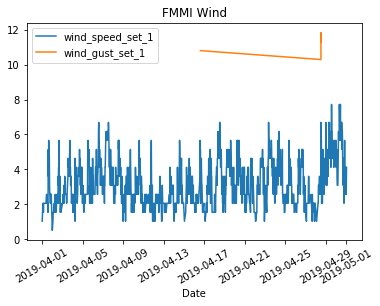

In [456]:
plt.plot(FMMI_wind_speed_clean['Date_Time'], FMMI_wind_speed_clean['wind_speed_set_1'])
plt.plot(FMMI_wind_gust_temp_set_clean['Date_Time'], FMMI_wind_gust_temp_set_clean['wind_gust_set_1'])

plt.xticks(rotation=30)

plt.title('FMMI Wind')
plt.legend(['wind_speed_set_1','wind_gust_set_1'], loc='best')

plt.xlabel('Date')
plt.show()

-----------------------------------------------------------------------------------------------------------------------------------------

### FGBT Plots

In [9]:
FGBT = data.where(data["Station_ID"]=="FGBT").dropna()
#heat_FGBT=FGBT[['heat_index_set_1d']].groupby(data['normalised_date'])
#heat_FGBT=heat_FGBT.mean()
#FGBT = FGBT.where(FGBT['heat_index_set_1d'] != 0)
#x= FGBT.loc[:, (FGBT != 0).any(axis=1)]
FGBT_his_clean = FGBT[(FGBT[['heat_index_set_1d']] != 0).all(axis=1)]
FGBT_air_temp_set_clean = FGBT[(FGBT[['air_temp_set_1']] != 0).all(axis=1)]

FGBT_wind_speed_clean = FGBT[(FGBT[['wind_speed_set_1']] != 0).all(axis=1)]
FGBT_wind_gust_temp_set_clean = FGBT[(FGBT[['wind_gust_set_1']] != 0).all(axis=1)]

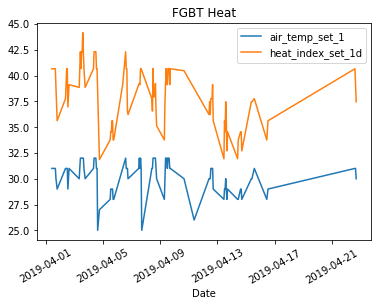

In [457]:
plt.plot(FGBT_air_temp_set_clean['Date_Time'], FGBT_air_temp_set_clean['air_temp_set_1'])
plt.plot(FGBT_his_clean['Date_Time'], FGBT_his_clean['heat_index_set_1d'])

plt.xticks(rotation=30)
plt.title('FGBT Heat')
plt.legend(['air_temp_set_1','heat_index_set_1d'], loc='best')

plt.xlabel('Date')
plt.show()

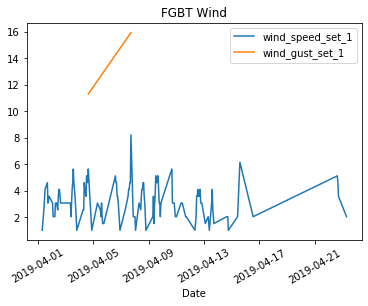

In [459]:
plt.plot(FGBT_wind_speed_clean['Date_Time'], FGBT_wind_speed_clean['wind_speed_set_1'])
plt.plot(FGBT_wind_gust_temp_set_clean['Date_Time'], FGBT_wind_gust_temp_set_clean['wind_gust_set_1'])

plt.xticks(rotation=30)
plt.title('FGBT Wind')
plt.legend(['wind_speed_set_1','wind_gust_set_1'], loc='best')

plt.xlabel('Date')
plt.show()

-----------------------------------------------------------------------------------------------------------------------------------------

## 3.2 Task 3

In [12]:
data.columns

Index(['index', 'Date_Time', 'Station_ID', 'air_temp_set_1', 'altimeter_set_1',
       'dew_point_temperature_set_1d', 'heat_index_set_1d', 'pressure_set_1d',
       'relative_humidity_set_1', 'sea_level_pressure_set_1d',
       'weather_cond_code_set_1', 'wind_cardinal_direction_set_1d',
       'wind_chill_set_1d', 'wind_direction_set_1', 'wind_gust_set_1',
       'wind_speed_set_1', 'normalised_date'],
      dtype='object')

### 3.2.1 Connect to database 

Starting the connection with the database, the connection needs the ip of the machine (The machine used here is Rasberry pi), It also needs user name, password and database name.

In [226]:
try:
    con = pymysql.connect(
        host='myip',
        user='mesouser',
        password='password',
        db='mesonet')

    cursor = con.cursor()
    
    print('Connection Started')
except Exception as e:
    print('connection failed')
    print(e)

Connection Started


### 3.2.2 Create Table

raw_data table has been created using the next query

```sql
create table weather(
id int primary key,
Date_time DATE,
Station_ID VARCHAR(30),
air_temp_set_1 decimal(20,10),
altimeter_set_1 decimal(20,10),
dew_point_temperature_set_1d decimal(20,10),
heat_index_set_1d decimal(20,10),
pressure_set_1d decimal(20,10),
relative_humidity_set_1 decimal(20,10),
sea_level_pressure_set_1d decimal(20,10),
weather_cond_code_set_1 decimal(20,10),
wind_cardinal_direction_set_1d VARCHAR(10),
wind_chill_set_1d decimal(20,10),
wind_direction_set_1 decimal(20,10),
wind_gust_set_1 decimal(20,10),
wind_speed_set_1 decimal(20,10)
);
```

The Index column name was renamed as id instead to be the same as the one in the table. NaN values in the original dataframe have been replaced with zero, because the table doesn't accept NaN values

In [15]:
raw_data = pd.read_csv('all_weather_data.csv', delimiter=';')
raw_data.rename(columns={'index':'id'}, inplace=True)
raw_data = raw_data.fillna(0)

This Insertion here is extensivly heavy process

In [156]:
# column list for insertion 
cols = '`,`'.join([str(i) for i in raw_data.columns.tolist()])
# Insert DataFrame
for i, row in raw_data.iterrows():
    sql = 'INSERT INTO `weather` (`' + cols + '`) VALUES (' + '%s,'*(len(row)-1) + '%s)' 
    cursor.execute(sql, tuple(row)) 
    con.commit()

Another way is to insert the data into mysql directly into the database but this method is not optimal and doesn't scale when working with an app.

```sql
LOAD DATA LOCAL INFILE 'all_weather_data.csv'  
INTO TABLE weather  FIELDS TERMINATED BY ';'  ENCLOSED BY '"' 
LINES TERMINATED BY '\n' IGNORE 1 ROWS;
```

### 3.3.3 All stations that have at least one row of values for heat_index_set_1d

This query returns the distinct values of all rows station id that doesn't have a NaN values or zeros (Notice that NaN has been zeros earlier prior to insertion). 

In [172]:
cursor.execute('SELECT DISTINCT(Station_ID) FROM `weather` WHERE not (heat_index_set_1d=0)') 
stations = cursor.fetchall()
stations

(('DTTD',),
 ('EPRZ',),
 ('FAEL',),
 ('FAPE',),
 ('FGBT',),
 ('FKKL',),
 ('FMMI',),
 ('FMMS',),
 ('FMMT',),
 ('FOOG',),
 ('FOOL',),
 ('FTTJ',),
 ('HDAM',),
 ('LFYR',),
 ('LZKZ',),
 ('MMTC',),
 ('NZCH',),
 ('OAKN',),
 ('RKSM',),
 ('RKSS',),
 ('RKTN',),
 ('SARF',),
 ('SAZN',),
 ('SBAR',),
 ('SBMO',),
 ('SBRF',),
 ('SGAS',),
 ('SPCL',),
 ('SPMS',),
 ('SPST',),
 ('UKLU',),
 ('VIDP',),
 ('VIJP',),
 ('VOPC',),
 ('VOSM',),
 ('VOTR',),
 ('VTUO',),
 ('VTUQ',),
 ('VTUV',),
 ('WIPP',),
 ('YAMB',),
 ('YBBN',),
 ('YBCG',),
 ('ZBHH',),
 ('ZSHC',),
 ('ZSNB',),
 ('ZSSS',))

## 3.4 Task 4

Calculating the precentage of collumns that have values over all the enteries in the dataframe

In [180]:
(raw_data[raw_data != 0].count(axis=0)/len(raw_data))*100

id                                 99.998763
Date_Time                         100.000000
Station_ID                        100.000000
air_temp_set_1                     97.994556
altimeter_set_1                    99.769887
dew_point_temperature_set_1d       99.343066
heat_index_set_1d                  16.846468
pressure_set_1d                    99.769887
relative_humidity_set_1            99.545961
sea_level_pressure_set_1d          99.500186
weather_cond_code_set_1            17.017197
wind_cardinal_direction_set_1d     90.251144
wind_chill_set_1d                   4.844736
wind_direction_set_1               84.827416
wind_gust_set_1                     6.731412
wind_speed_set_1                   91.552641
dtype: float64

Saving the columns that needed to be removed into list

In [13]:
nan_values_columns = ['wind_chill_set_1d', 'wind_gust_set_1']

The two columns have been removed from the database using the next script

In [226]:
sql = 'ALTER TABLE `weather` DROP COLUMN wind_chill_set_1d' 
cursor.execute(sql)
con.commit()
sql = 'ALTER TABLE `weather` DROP COLUMN wind_gust_set_1' 
cursor.execute(sql) 
con.commit()

Now the Database consists of 14 columns

In [235]:
cursor.execute('DESCRIBE `weather`') 

14

-----------------------------------------------------------------------------------------------------------------------------------------

## 3.5 Task 5

```sql
CREATE VIEW weather_clean AS SELECT * FROM weather 
WHERE NOT (air_temp_set_1 = 0 or altimeter_set_1 = 0 
           or dew_point_temperature_set_1d = 0 or heat_index_set_1d = 0 
           or pressure_set_1d = 0 or relative_humidity_set_1 = 0 or 
           sea_level_pressure_set_1d = 0 or weather_cond_code_set_1 = 0 
           or wind_direction_set_1 = 0 or wind_speed_set_1 = 0);

```

-----------------------------------------------------------------------------------------------------------------------------------------

## 3.6 Task 6

To normalise the data
- First Normal Form:
    - Columns contain atomic values (StationID, wind_cardinal_direction_set_1d, pressure_set_1d columns broke that condition)
- Second Normal Form:
    - There are no vilation against second order form (The columns are not partially dependent)
- Third order Form:
    - There are no vilation against Third order form (The columns are not transitive dependent)

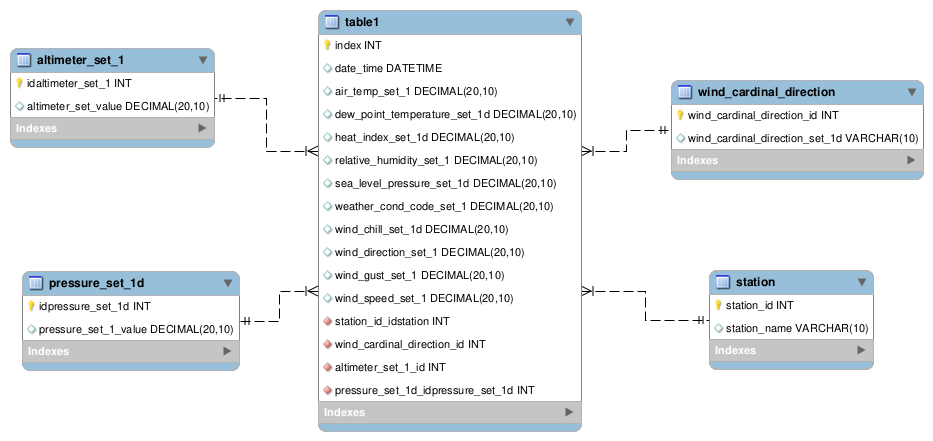

In [451]:
Image(filename='nor_model.png',width=1000)

-----------------------------------------------------------------------------------------------------------------------------------------

## 3.7 PCA Analysis

- first we fetch columns names from the view in database

In [227]:
sql = 'show columns from `weather_clean`' 
cursor.execute(sql)
column_names = [column[0] for column in cursor.fetchall()]

In [452]:
column_names

['id',
 'Date_time',
 'Station_ID',
 'air_temp_set_1',
 'altimeter_set_1',
 'dew_point_temperature_set_1d',
 'heat_index_set_1d',
 'pressure_set_1d',
 'relative_humidity_set_1',
 'sea_level_pressure_set_1d',
 'weather_cond_code_set_1',
 'wind_cardinal_direction_set_1d',
 'wind_direction_set_1',
 'wind_speed_set_1']

- Then we fetch all cleaned data from the view and convert it to numpy array prior to application of PCA

In [267]:
clean_data_array = np.array([])
sql = 'SELECT * FROM `weather_clean`' 

cursor.execute(sql)
clean_data_array = np.array(cursor.fetchall())

In [268]:
clean_data_array.shape

(2644, 14)

- Then we convert numpy array to dataframe for easier manipulation

In [326]:
df =pd.DataFrame(data=clean_data_array[0:,0:],  
             index=clean_data_array[0:,0],    
             columns=column_names)  

In [327]:
df

,id,Date_time,Station_ID,air_temp_set_1,altimeter_set_1,dew_point_temperature_set_1d,heat_index_set_1d,pressure_set_1d,relative_humidity_set_1,sea_level_pressure_set_1d,weather_cond_code_set_1,wind_cardinal_direction_set_1d,wind_direction_set_1,wind_speed_set_1
22236,22236,2019-04-30,FAPE,35.0000000000,100900.7900000000,14.1500000000,34.3700000000,100079.8200000000,28.4800000000,100846.4000000000,33.0000000000,SW,220.0000000000,18.0100000000
22282,22282,2019-04-02,FGBT,31.0000000000,100799.2000000000,27.0200000000,40.6600000000,100752.6500000000,79.3900000000,100797.4900000000,5.0000000000,WSW,250.0000000000,4.1200000000
22283,22283,2019-04-02,FGBT,29.0000000000,100799.2000000000,27.0100000000,36.9600000000,100752.6500000000,89.0200000000,100797.7900000000,5.0000000000,SSW,210.0000000000,4.1200000000
22284,22284,2019-04-02,FGBT,31.0000000000,100700.9900000000,26.0200000000,39.1200000000,100654.4900000000,74.8500000000,100699.2900000000,5.0000000000,S,190.0000000000,3.0900000000
22318,22318,2019-04-04,FGBT,31.0000000000,100599.4000000000,27.0200000000,40.6600000000,100552.9400000000,79.3900000000,100597.6900000000,5.0000000000,SW,220.0000000000,4.6300000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79201,79201,2019-04-23,ZSNB,28.0000000000,100700.9900000000,21.0100000000,30.1300000000,100654.4900000000,65.8300000000,100699.7400000000,6.0000000000,NNE,20.0000000000,2.0000000000
79202,79202,2019-04-23,ZSNB,27.0000000000,100599.4000000000,21.0100000000,28.8400000000,100552.9400000000,69.7900000000,100598.2900000000,6.0000000000,NNE,30.0000000000,2.0000000000
79223,79223,2019-04-24,ZSNB,28.0000000000,100700.9900000000,22.0100000000,30.6600000000,100654.4900000000,69.9800000000,100699.7300000000,6.0000000000,NNW,340.0000000000,3.0000000000
79224,79224,2019-04-24,ZSNB,27.0000000000,100599.4000000000,22.0100000000,29.2100000000,100552.9400000000,74.1900000000,100598.2900000000,6.0000000000,NNE,30.0000000000,3.0000000000


- Then we drop index, StationID and wind_cardinal_direction_set_1d collumns

In [329]:
new_df = df.drop(df.columns[[0, 1, 11]], axis = 1) 

In [330]:
new_df

,Station_ID,air_temp_set_1,altimeter_set_1,dew_point_temperature_set_1d,heat_index_set_1d,pressure_set_1d,relative_humidity_set_1,sea_level_pressure_set_1d,weather_cond_code_set_1,wind_direction_set_1,wind_speed_set_1
22236,FAPE,35.0000000000,100900.7900000000,14.1500000000,34.3700000000,100079.8200000000,28.4800000000,100846.4000000000,33.0000000000,220.0000000000,18.0100000000
22282,FGBT,31.0000000000,100799.2000000000,27.0200000000,40.6600000000,100752.6500000000,79.3900000000,100797.4900000000,5.0000000000,250.0000000000,4.1200000000
22283,FGBT,29.0000000000,100799.2000000000,27.0100000000,36.9600000000,100752.6500000000,89.0200000000,100797.7900000000,5.0000000000,210.0000000000,4.1200000000
22284,FGBT,31.0000000000,100700.9900000000,26.0200000000,39.1200000000,100654.4900000000,74.8500000000,100699.2900000000,5.0000000000,190.0000000000,3.0900000000
22318,FGBT,31.0000000000,100599.4000000000,27.0200000000,40.6600000000,100552.9400000000,79.3900000000,100597.6900000000,5.0000000000,220.0000000000,4.6300000000
...,...,...,...,...,...,...,...,...,...,...,...
79201,ZSNB,28.0000000000,100700.9900000000,21.0100000000,30.1300000000,100654.4900000000,65.8300000000,100699.7400000000,6.0000000000,20.0000000000,2.0000000000
79202,ZSNB,27.0000000000,100599.4000000000,21.0100000000,28.8400000000,100552.9400000000,69.7900000000,100598.2900000000,6.0000000000,30.0000000000,2.0000000000
79223,ZSNB,28.0000000000,100700.9900000000,22.0100000000,30.6600000000,100654.4900000000,69.9800000000,100699.7300000000,6.0000000000,340.0000000000,3.0000000000
79224,ZSNB,27.0000000000,100599.4000000000,22.0100000000,29.2100000000,100552.9400000000,74.1900000000,100598.2900000000,6.0000000000,30.0000000000,3.0000000000


- Then we scale the columns

In [427]:
cols_to_std = ['air_temp_set_1', 
              'altimeter_set_1', 
              'dew_point_temperature_set_1d', 
              'heat_index_set_1d', 
              'pressure_set_1d', 
              'relative_humidity_set_1', 
              'sea_level_pressure_set_1d', 
              'weather_cond_code_set_1', 
              'wind_direction_set_1',
              'wind_speed_set_1']

df_std = new_df.copy()
df_std[cols_to_std] = StandardScaler().fit_transform(new_df[cols_to_std])
df_std

,Station_ID,air_temp_set_1,altimeter_set_1,dew_point_temperature_set_1d,heat_index_set_1d,pressure_set_1d,relative_humidity_set_1,sea_level_pressure_set_1d,weather_cond_code_set_1,wind_direction_set_1,wind_speed_set_1
22236,FAPE,0.502599,0.221362,0.0977554,0.365758,1.24164,-0.37951,0.668489,0.381747,0.116735,10.4807
22282,FGBT,-0.400643,-0.158471,1.68122,2.10797,1.62439,1.53098,0.512683,-0.132959,0.406637,0.725055
22283,FGBT,-0.852264,-0.158471,1.67999,1.08314,1.62439,1.89236,0.513638,-0.132959,0.0201016,0.725055
22284,FGBT,-0.400643,-0.525667,1.55819,1.68142,1.56855,1.36061,0.199859,-0.132959,-0.173166,0.00163633
22318,FGBT,-0.400643,-0.9055,1.68122,2.10797,1.51078,1.53098,-0.123795,-0.132959,0.116735,1.08325
...,...,...,...,...,...,...,...,...,...,...,...
79201,ZSNB,-1.07807,-0.525667,0.941778,-0.808646,1.56855,1.02212,0.201293,-0.114577,-1.81594,-0.763923
79202,ZSNB,-1.30388,-0.9055,0.941778,-1.16595,1.51078,1.17072,-0.121884,-0.114577,-1.71931,-0.763923
79223,ZSNB,-1.07807,-0.525667,1.06481,-0.661846,1.56855,1.17785,0.201261,-0.114577,1.27634,-0.061575
79224,ZSNB,-1.30388,-0.9055,1.06481,-1.06347,1.51078,1.33584,-0.121884,-0.114577,-1.71931,-0.061575


In [433]:
df_std = df_std.drop(df_std.columns[[0]], axis = 1)

In [434]:
df_std

,air_temp_set_1,altimeter_set_1,dew_point_temperature_set_1d,heat_index_set_1d,pressure_set_1d,relative_humidity_set_1,sea_level_pressure_set_1d,weather_cond_code_set_1,wind_direction_set_1,wind_speed_set_1
22236,0.502599,0.221362,0.0977554,0.365758,1.24164,-0.37951,0.668489,0.381747,0.116735,10.4807
22282,-0.400643,-0.158471,1.68122,2.10797,1.62439,1.53098,0.512683,-0.132959,0.406637,0.725055
22283,-0.852264,-0.158471,1.67999,1.08314,1.62439,1.89236,0.513638,-0.132959,0.0201016,0.725055
22284,-0.400643,-0.525667,1.55819,1.68142,1.56855,1.36061,0.199859,-0.132959,-0.173166,0.00163633
22318,-0.400643,-0.9055,1.68122,2.10797,1.51078,1.53098,-0.123795,-0.132959,0.116735,1.08325
...,...,...,...,...,...,...,...,...,...,...
79201,-1.07807,-0.525667,0.941778,-0.808646,1.56855,1.02212,0.201293,-0.114577,-1.81594,-0.763923
79202,-1.30388,-0.9055,0.941778,-1.16595,1.51078,1.17072,-0.121884,-0.114577,-1.71931,-0.763923
79223,-1.07807,-0.525667,1.06481,-0.661846,1.56855,1.17785,0.201261,-0.114577,1.27634,-0.061575
79224,-1.30388,-0.9055,1.06481,-1.06347,1.51078,1.33584,-0.121884,-0.114577,-1.71931,-0.061575


- Group by station id, application of Lambda funcion here is due to having mean() method only deals with float and int values

In [435]:
x = df_std.groupby(new_df["Station_ID"], as_index=False)

In [436]:
x = x.apply(lambda x: x.mean())
x

,air_temp_set_1,altimeter_set_1,dew_point_temperature_set_1d,heat_index_set_1d,pressure_set_1d,relative_humidity_set_1,sea_level_pressure_set_1d,weather_cond_code_set_1,wind_direction_set_1,wind_speed_set_1
0,0.502599,0.221362,0.097755,0.365758,1.241636,-0.379510,0.668489,0.381747,0.116735,10.480672
1,-0.490967,-0.305350,1.619580,1.721031,1.602052,1.520361,0.387738,-0.132959,0.126399,0.831110
2,0.338373,1.235404,-0.581288,-0.112918,-0.970885,-0.643187,0.540412,-0.096195,-0.647550,0.130613
3,-1.078074,3.487958,0.512385,-1.199883,-6.058396,0.543650,0.124457,-0.132959,-1.260296,0.178979
4,-1.303885,2.177526,1.432689,-0.598140,1.992158,1.886360,2.507730,-0.022665,-0.487226,0.180735
5,-1.129064,1.975966,1.377879,-0.303377,1.930235,1.659262,2.328202,0.265523,-0.572170,0.314068
6,-1.063661,0.703020,1.582373,0.300461,1.755403,1.927424,1.248071,0.190883,0.001597,0.399434
7,-1.048250,0.655657,1.477493,0.099881,1.694218,1.747504,1.194180,0.151794,0.021013,0.248452
8,0.294675,-0.269930,-1.186222,-0.301851,-0.343760,-0.824333,-0.346004,0.117842,-0.246837,0.604056
9,-0.775918,1.387398,-1.072428,-1.448475,-4.729438,-0.656029,-0.870816,0.404506,0.507872,2.012025


### Explained Variance

Using the Scikit learn PCA class to plot variances for each components

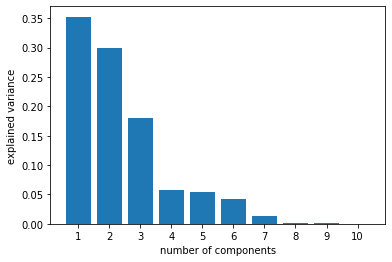

In [437]:
pca = PCA()
X_pca = pca.fit_transform(x)
explained_variance = pca.explained_variance_ratio_

bars = ['1', '2', '3', '4', '5', '6','7','8','9','10']
y_pos = np.arange(len(bars))

plt.bar(y_pos, explained_variance[0:10])
plt.xticks(y_pos, bars)
plt.xlabel('number of components')
plt.ylabel('explained variance')

plt.show()

Explained variance shows that the first 6 components explain >90% of the variance in the data. Plotting scores and loadings by using Hoggorm for the first largest 6 components

In [438]:
data = x.values
data_var_names = list(x.columns)
data_obj_names = list(np.unique(new_df["Station_ID"]))
model = ho.nipalsPCA(arrX=data, Xstand=False, cvType=["loo"], numComp=6)

loo


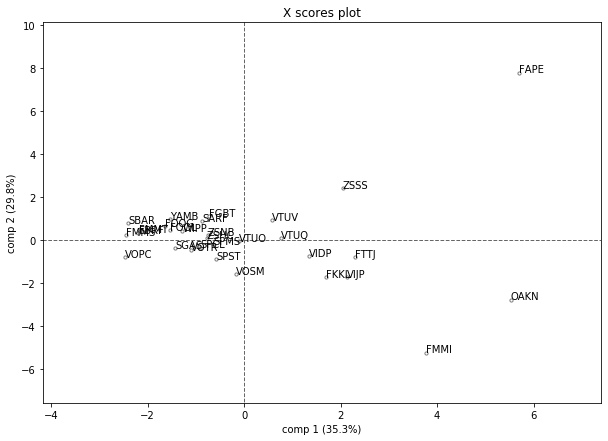

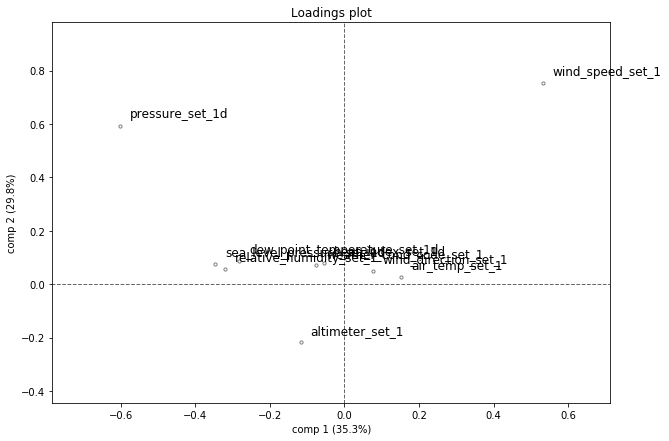

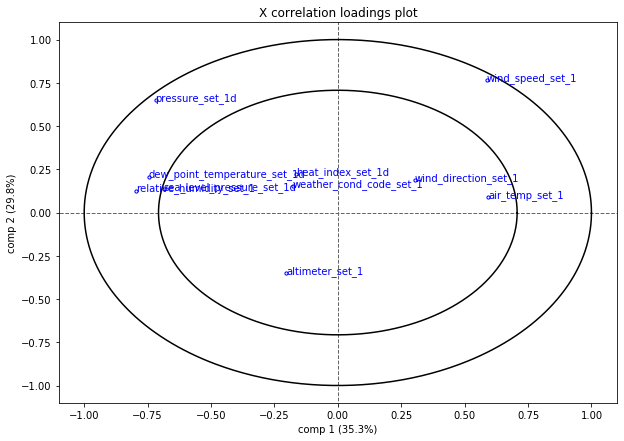

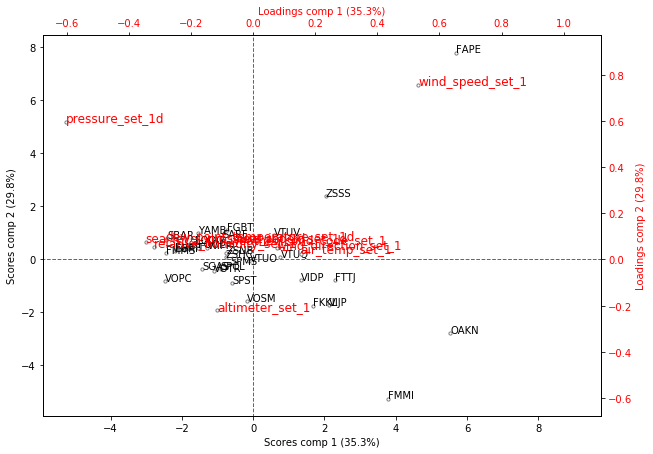

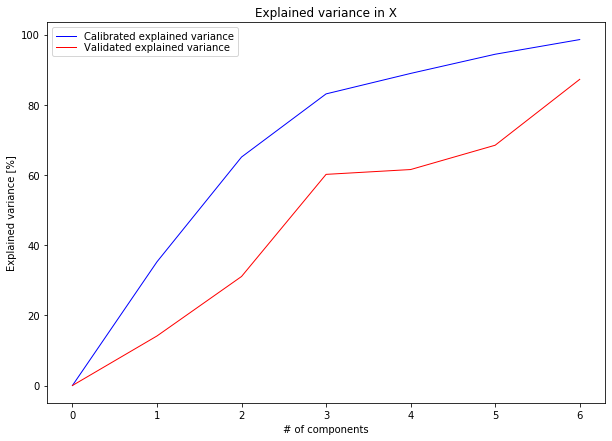

In [439]:
hop.plot(model, comp=[1, 2], 
         plots=[1, 2, 3, 4, 6], 
         objNames=data_obj_names, 
         XvarNames=data_var_names,
         figsize=(10, 7))

By ploting the score and loading over each other, It's clearly noticed that column 'Wind_speed_set_1' is highly correlated with 'FAPE' observation. Also observations 'VOSM','VOPC' and 'SPST' is closer than other observations to 'Altimeter set 1'. Otherwise, All other observation seem to have assoctaions of several features.

In [441]:
try:
    con.close()
    print('Connection Closed')
except:
    print('Already Closed')

Already Closed


-----------------------------------------------------------------------------------------------------------------------------------------

# 4. References

Ingunn Burud & Aleksander Hykkerud, 2020, INF230 Data Processing and Analysis Course Materials.

https://medium.com/analytics-vidhya/inserting-pandas-dataframes-into-database-using-insert-815f0e4e6361

https://stackoverflow.com/questions/13428310/python-import-column-data-from-mysql-as-array